   ### Dow Jones Index

Source: https://archive.ics.uci.edu/ml/datasets/dow+jones+index

Esse dataset foi retirado do repositório de Machine Learning do UCI com intuído de realizar a exploração dos dados, construir visualizações para entender mais sobre os dados e no fim construir um modelo de Classificação que traga uma boa taxa de acurácia.

A idéia é prever a porcentagem de retorno do dividendo na próxima semana utilizando o método Ensemble ExtraTreesClassifier

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Imports das Libs de ML
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Realizando a leitura do arquivo .csv
arquivo = 'Dow_Jones_Stocks.csv'
stock_analysis = read_csv(arquivo, encoding ='utf-8') # , index_col = 'date'
print(stock_analysis.shape)

(750, 16)


In [3]:
# Verificando o dataset
stock_analysis.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,07-01-11,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,14-01-11,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,21-01-11,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,28-01-11,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,04-02-11,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [4]:
# Verificando se existe alguma feature NaN
stock_analysis.isna().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [5]:
# Removendo as colunas que não utilizarei para o modelo 
stock_analysis.drop(['quarter', 'stock', 'date'], axis = 1, inplace = True)

In [6]:
# Removendo os dados NaN
df = stock_analysis.dropna(subset=['percent_change_volume_over_last_wk'])

In [7]:
# Verificando os tipos de dados 
df.dtypes

open                                  float64
high                                  float64
low                                   float64
close                                 float64
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                       float64
next_weeks_close                      float64
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

In [8]:
# Verificando a correlação dos dados utilizando o métod Pearson
df.corr(method = 'pearson')

,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
open,1.000000,0.999613,0.999339,0.999049,-0.522450,0.074321,-0.008510,-0.511910,0.998950,0.997774,0.066695,-0.059737,-0.147291
high,0.999613,1.000000,0.999420,0.999555,-0.521307,0.091083,-0.006513,-0.511344,0.999476,0.998481,0.069589,-0.060586,-0.149462
low,0.999339,0.999420,1.000000,0.999549,-0.524210,0.095997,-0.017541,-0.511540,0.999435,0.998299,0.067255,-0.060948,-0.144788
close,0.999049,0.999555,0.999549,1.000000,-0.523935,0.110531,-0.016479,-0.511354,0.999917,0.998836,0.067789,-0.060981,-0.147205
volume,-0.522450,-0.521307,-0.524210,-0.523935,1.000000,-0.173245,0.181672,0.887631,-0.523710,-0.523208,-0.091106,-0.057734,-0.269797
percent_change_price,0.074321,0.091083,0.095997,0.110531,-0.173245,1.000000,-0.234496,-0.068675,0.110819,0.111796,0.020639,-0.009060,0.049963
percent_change_volume_over_last_wk,-0.008510,-0.006513,-0.017541,-0.016479,0.181672,-0.234496,1.000000,-0.129519,-0.015416,-0.015660,0.013181,-0.033348,-0.017486
previous_weeks_volume,-0.511910,-0.511344,-0.511540,-0.511354,0.887631,-0.068675,-0.129519,1.000000,-0.511349,-0.511120,-0.102408,-0.047727,-0.270266
next_weeks_open,0.998950,0.999476,0.999435,0.999917,-0.523710,0.110819,-0.015416,-0.511349,1.000000,0.998872,0.067147,-0.061205,-0.147101
next_weeks_close,0.997774,0.998481,0.998299,0.998836,-0.523208,0.111796,-0.015660,-0.511120,0.998872,1.000000,0.106578,-0.062794,-0.144895


In [9]:
# Verificando a assimetria dos dados
df.skew()

open                                  1.271666
high                                  1.271656
low                                   1.281314
close                                 1.275546
volume                                2.868761
percent_change_price                 -0.414007
percent_change_volume_over_last_wk    2.544001
previous_weeks_volume                 3.256532
next_weeks_open                       1.274181
next_weeks_close                      1.280180
percent_change_next_weeks_price      -0.137200
days_to_next_dividend                 2.967252
percent_return_next_dividend          0.398394
dtype: float64

In [10]:
# Verificando as medidas dos dados
df.describe()

,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,720.000000,720.000000,720.000000,720.000000,7.200000e+02,720.000000,720.000000,7.200000e+02,720.000000,720.000000,720.000000,720.000000,720.000000
mean,53.748375,54.764806,52.727875,53.825486,1.156040e+08,0.030140,5.593627,1.173876e+08,53.808500,53.971319,0.193309,52.259722,0.691564
std,32.764255,33.357485,32.238065,32.924759,1.520844e+08,2.504889,40.543478,1.592322e+08,32.919751,33.145594,2.663880,45.881968,0.305077
min,10.590000,10.940000,10.400000,10.520000,9.718851e+06,-15.422900,-61.433175,9.718851e+06,10.520000,10.520000,-15.422900,0.000000,0.065574
25%,29.965000,30.662500,28.712500,30.415000,3.069225e+07,-1.297355,-19.804284,3.067832e+07,30.385000,30.507500,-1.252413,24.000000,0.534092
50%,46.015000,46.910000,44.950000,46.125000,5.274535e+07,0.000000,0.512586,5.294556e+07,46.040000,45.930000,0.035998,47.000000,0.680141
75%,72.805000,74.340000,71.105000,72.765000,1.311530e+08,1.630870,21.800622,1.333230e+08,72.805000,73.002500,1.792650,69.250000,0.854024
max,172.110000,173.540000,167.820000,170.580000,1.054415e+09,9.882230,327.408924,1.453439e+09,172.110000,174.540000,9.882230,329.000000,1.564210


<AxesSubplot:xlabel='percent_return_next_dividend', ylabel='Density'>

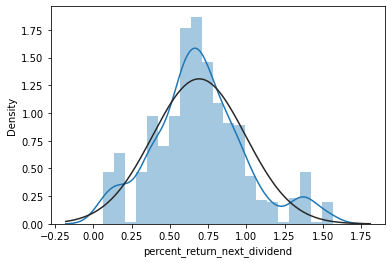

In [11]:
# Verificando se os dados estao normalizados
from scipy import stats
sns.distplot(df.percent_return_next_dividend, fit = stats.norm)

In [12]:
# Definindo a variável target
target = 'percent_return_next_dividend'
Y = np.asarray(df[target])

In [13]:
# Definindo a variável preditora
features = df.columns.drop([target])
X = np.asarray(df[features])

In [14]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [15]:
# Nessa etapa foi preciso utilizar o LabelEncoder para codificar a variável target

from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
n_samples = 2
df = pd.DataFrame(data=norm.rvs(size=len(X_train)),
                  columns=['X_train'])
y_train = label_encoder.fit_transform(pd.cut(y_train , n_samples, retbins=True)[0])
y_test = label_encoder.fit_transform(pd.cut(y_test , n_samples, retbins=True)[0])
classifier = ExtraTreesClassifier(n_estimators = 300)
classifier.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=300)

In [16]:
# Utilizando validação cruzada para calcular o score
scores = cross_val_score(classifier, X_train, y_train, cv = 5, scoring = 'accuracy', n_jobs= 1)

In [17]:
# Print no resultado 
print("Acurácia em treino: Média = %0.3f Desvio Padrão = %0.3f" % (np.mean(scores), np.std(scores)))

Acurácia em treino: Média = 0.861 Desvio Padrão = 0.038


In [18]:
# Fazendo previsões
y_pred = classifier.predict(X_test)

In [19]:
# Confusion Matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

[[140  13]
 [ 16  47]]


In [20]:
# Print no resultado
print("Acurária nos dados de Teste: ", accuracy_score(y_test, y_pred))

Acurária nos dados de Teste:  0.8657407407407407
